### Emma Klemets, 260775167   
All my work, code, output and written answers are in this notebook.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

### 1) 
*Write a function that will shift an array by an arbitrary amount using a convolution (yes, I know there are easier ways to do this). The function should take 2 arguments - an array, and an amount by which to shift the array. Plot a gaussian that started in the centre of the array shifted by half the array length.*

In [3]:
#shifts array arr by dx
def shiftFunction(arr, dx):
    arrFT = np.fft.fft(arr)
    #convolve with shifted delta function
    # FFT of delta(x-a) is just an exp(-2i pi k a /N)

    N=x.size
    k=np.arange(N)
    delFT = np.exp(-2j*np.pi*k*dx/N)

    shiftedArr = np.fft.ifft(arrFT*delFT)
    return shiftedArr.real

10000.0


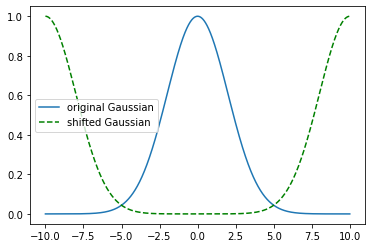

In [4]:
dx = 0.001
x = np.arange(-10, 10, dx)

#gaussian function
mean = 0
std = 2
gaussian = np.exp(-(x - mean)**2 / (2*std**2))

#shift by half the length
shift = len(x)/2
print(shift)

#could shift by arbitrary amount using this 
# shift = 5 / dx
# print(shift)

gaussianShift = shiftFunction(gaussian, shift)

#plotting results
plt.plot(x, gaussian, label='original Gaussian')
plt.plot(x, gaussianShift, ls="--", label='shifted Gaussian', c='g')
plt.legend()
plt.show()

### 2) 
*The correlation function $f*g$ is integral of f(x)g(x+y)dx. Through a similar proof, one can show $f*g = ift(dft(f) ∗ conj(dft(g)))$. Write a routine to take the correlation function of two arrays. Plot the correlation function of a Gaussian with itself.*

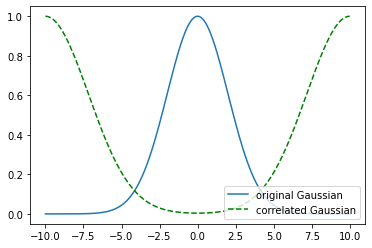

In [5]:
#returns correlation of two array, computed as ift(dft(f) ∗ conj(dft(g)))
def corrFunction(arr1, arr2):
    arrFT1 = np.fft.fft(arr1)
    arrFT2 = np.fft.fft(arr2)
    
    corrFunct = np.fft.ifft(arrFT1 * np.fft.fft(arr2[::-1]))
    return corrFunct.real/max(corrFunct.real) #scaled to be able to see it better

gaussianCor = corrFunction(gaussian, gaussian)
plt.plot(x, gaussian, label='original Gaussian')

plt.plot(x, gaussianCor, ls="--", label='correlated Gaussian', c='g')
plt.legend(loc="lower right")

plt.show()

### 3) 
*Using the results of part 1 and part 2, write a routine to take the correlation function of a Gaussian (shifted by an arbitrary amount) with itself. How does the correlation function depend on the shift? Does this surprise you?*

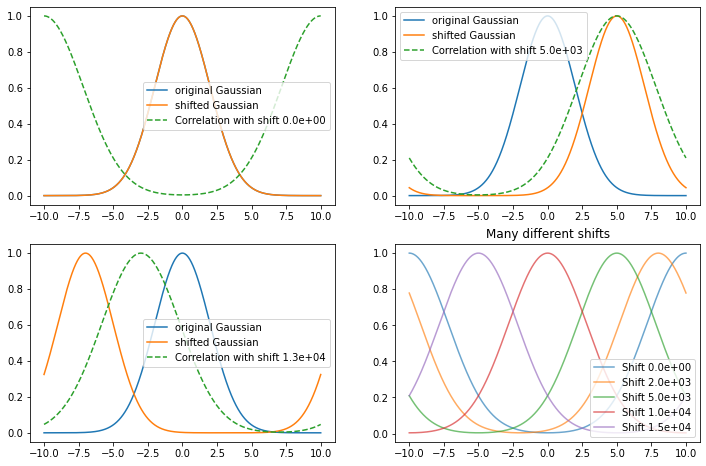

In [6]:

fig, ax = plt.subplots(2, 2, figsize=(12,8))
axs = ax.flatten()

#plot the gaussian, shifted on and the resulting correlation function for a couple numbers
s = [0, 5, 13]

for i, s_i in enumerate(s):

    #shift by arbitrary amount using this 
    shift = s_i / dx

    gaussianShift = shiftFunction(gaussian, shift)
    gaussianShift_Cor = corrFunction(gaussian, gaussianShift)

    axs[i].plot(x, gaussian, label='original Gaussian')

    axs[i].plot(x, gaussianShift, label='shifted Gaussian')
    axs[i].plot(x, gaussianShift_Cor, ls="--", label="Correlation with shift {:.1e}".format(shift))
    axs[i].legend()

#plot just the correlation function for a bunch numbers on the same graph for comparison
s = [0, 2, 5, 10, 15]
for i, s_i in enumerate(s):

    #shift by arbitrary amount using this 
    shift = s_i / dx

    gaussianShift = shiftFunction(gaussian, shift)
    gaussianShift_Cor = corrFunction(gaussian, gaussianShift)

    axs[3].plot(x, gaussianShift_Cor, label="Shift {:.1e}".format(shift), alpha=0.65)
    axs[3].legend(loc="lower right")
    
axs[3].set_title("Many different shifts")   
plt.show()

These results are surprising, as the correlation function is not always a max where the functions overlap the most. For the 0 shifted one, we see the opposite result, where the correlation function is a minimum where the gaussians overlap. I think this is caused from the wrap around of the DFT, where the negative frequencies are shifted so the overlap that we see with the two gaussians plotted individually is not actually what the correlation function is expressing.

### 4) 
*The circulant (wrap-around) nature of the dft can sometimes be problematic. Write a routine to take the convolution of two arrays without any danger of wrapping around. You may wish to add zeros to the end of the input arrays.*

In [7]:
#convolve two arrays and add a variable amount of padding (p) before doing so
def convFunction(arr1, arr2, p=5):
    
    arrFT1 = np.fft.fft(np.pad(arr1, [0, p]))
    arrFT2 = np.fft.fft(np.pad(arr2, [0, p]))
        
    convolved = np.fft.ifft(arrFT1 * arrFT2)
    
    if p > 0:
        convolved = convolved[:-p]

    return convolved.real

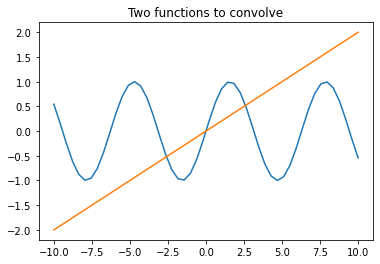

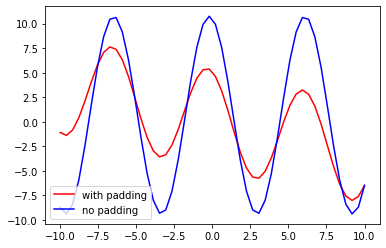

In [8]:
#graph an example
x = np.linspace(-10, 10)

f1 = np.sin(x)
f2 = 0.2*x

plt.plot(x, f1)
plt.plot(x, f2)
plt.title("Two functions to convolve")

plt.show()

cf_p = convFunction(f1, f2, p=50)
cf = convFunction(f1, f2, p=0)

plt.plot(x, cf_p, label="with padding", c='r')
plt.plot(x, cf, label="no padding", c='b')
plt.legend()

plt.show()

### 5) 
*DFTs work very nicely out of the box when there are an integer number of periods of a wave in the region analyzed. Sadly, when we are dealing with real data, we usually are forced to analyze a finite chunk of data, and there will in general be no particular relation between the frequencies in the data and the interval we’re analyzing. We’ll look at the effects of this a bit now.*

#### a) 
*Show that:* $\sum^{N-1}_{x=0} exp (-2i\pi kx/N) = \frac{1-exp(-2i\pi k)}{1-exp(-2i\pi k/N)}$

$\sum^{N-1}_{x=0} exp (-2i\pi kx/N) \\
= \sum^{N-1}_{x=0} \alpha ^x  ~~ where~ \alpha = exp (-2i\pi k/N)$   
This is simply a geometric series.   

$$
S = \sum^{N-1}_{x=0} \alpha ^x = 1 + \alpha + \alpha^2 + ... +\alpha^{N-1} \\
\text{multiply both sides by $\alpha$:} ~~~ S\alpha = \alpha + \alpha^2 + ... +\alpha^{N} \\
\text{subtract from previous line:} \\
S - S\alpha = 1 + \alpha + \alpha^2 + ... +\alpha^{N-1} - (\alpha + \alpha^2 + ... +\alpha^{N} ) \\
(1-\alpha)S = 1 - \alpha^{N} \\
\implies S = \frac{1 - \alpha^{N}}{1 - \alpha}
$$
And putting the value of $\alpha$ back in, we get:   
$\sum^{N-1}_{x=0} exp (-2i\pi kx/N) = S = \frac{1-exp(-2i\pi k/N)^N}{1-exp(-2i\pi k/N)} = \frac{1-exp(-2i\pi k)}{1-exp(-2i\pi k/N)} $

#### b) 
*Show that this approaches N as k approaches zero, and is zero for any integer k that is not a multiple of N*

i)

$lim_{k\rightarrow 0} \frac{1-exp(-2i\pi k)}{1-exp(-2i\pi k/N)} = \frac{0}{0} \implies \text{use L'Hôpital's}\\
= lim_{k\rightarrow 0} \frac{d/dk (1-exp(-2i\pi k))}{d/dk(1-exp(-2i\pi k/N))} = lim_{k\rightarrow 0} \frac{ -(-2i\pi~ exp(-2i\pi k))}{-(-2i\pi /N ~ exp(-2i\pi k/N))}\\
= lim_{k\rightarrow 0} \frac{ N ~exp(-2i\pi k)}{ exp(-2i\pi k/N)} = N ~ lim_{k\rightarrow 0} \frac{ exp(-2i\pi k)}{ exp(-2i\pi k/N)} = N
$

ii)   
With k integer

$exp (-2i\pi k) = cos(-2\pi k) + isin(-2\pi k) = 1 +i0 = 1$, so the top of the expression is 1 - 1

In the denominator, we have $exp (-2i\pi k/N) = cos(-2\pi k/N) + isin(-2\pi k/N)$. Two cases:
1. if k is a multiple of N, $exp (-2i\pi k/N) = 0$ and we get 0/0 and then limit above holds. 

2. If K is not a multiple of N then $exp (-2i\pi k/N) \neq 0$, then we just get $lim_{k\rightarrow 0} \frac{1-exp(-2i\pi k)}{1-exp(-2i\pi k/N)} = \frac{0}{1-exp(-2i\pi k/N)} = 0$

#### c) 
*We can use this to analytically write down the DFT of a non-integer sine wave.*

*Pick a non-integer value of k and plot your analytic estimate of the DFT. Show that the FFT agrees (to within machine precision) with your analytic estimate. Normally, we think of the Fourier transform of a pure sine wave to be a delta function. Are we close to that? This phenomenon is usually known as spectral leakage.*


$ f(x) = sin(2\pi kx/N)\\
 F(k') = \sum_{x=0}^{N-1} sin(2\pi kx/N) exp(-2i\pi k'x/N) = \sum_{x=0}^{N-1} \frac{e^{2i\pi kx/N} - e^{-2i\pi kx/N}}{2i} exp(-2i\pi k'x/N)\\
 = \frac{1}{2i} \sum_{x=0}^{N-1} exp(-2i\pi (k-k')x/N) - exp(-2i\pi (k+k')x/N)
 = \frac{1}{2i} (\sum_{x=0}^{N-1} exp(-2i\pi (k-k')x/N) - \sum_{x=0}^{N-1}exp(-2i\pi (k+k')x/N))
$

Which is just the sum from before, so for the two cases where the k+/-k' approches zero, we get N:

$
F(k') = \begin{cases} 
      \frac{N}{2i} & k=k' \\
      \frac{-N}{2i} & k=-k' \\
      0 & else
   \end{cases}
$

So we get the expected two delta functions for the DFT, when k is an integer.

In [9]:
# analytic DFT of sine wave
def analyticSinFT(k, x, N):
    kVals=np.arange(N)

    summed = []
    for k_i in kVals:
        summed.append( 1/(2j) * (-np.sum(np.exp(-2j*np.pi*( k - k_i ) *x/N) + np.exp(-2j*np.pi*( k + k_i )*x/N) ) ) )
    
    return  np.array(summed), kVals

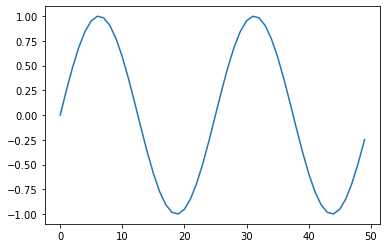

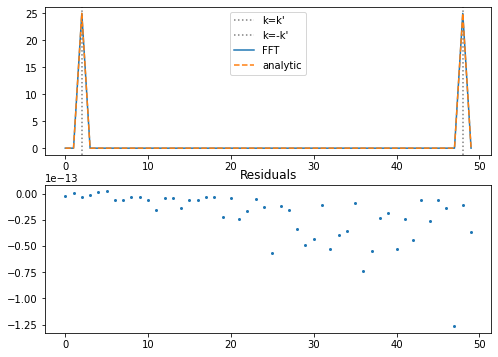

In [10]:
#first with k integer -> should get nice results

N = 50.0
x = np.arange(N)
k = 2.0
sinArr = np.sin(2*np.pi*k*x/N)

#get our DFT
sinArrDFT = np.fft.fft(sinArr)
sinArrAn, k_arr = analyticSinFT(k, x, N)

plt.plot(x, sinArr)
plt.show()

#looks like a proper delta function
fig, ax = plt.subplots(2, 1, figsize=(8,6))

ax[0].axvline(k, ls=":", color="grey", label="k=k'")
ax[0].axvline(-k+N, ls=":", color="grey", label="k=-k'")

ax[0].plot(k_arr, abs(sinArrDFT), label="FFT")
ax[0].plot(k_arr, abs(sinArrAn), ls="--", label="analytic")
ax[0].legend()

#pretty small, the numpy one is always slighly smaller which is interesting
ax[1].set_title("Residuals")
ax[1].plot(k_arr, abs(sinArrDFT) - abs(sinArrAn), ls="", marker=".", markersize=4)
plt.show()


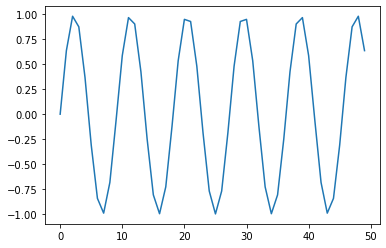

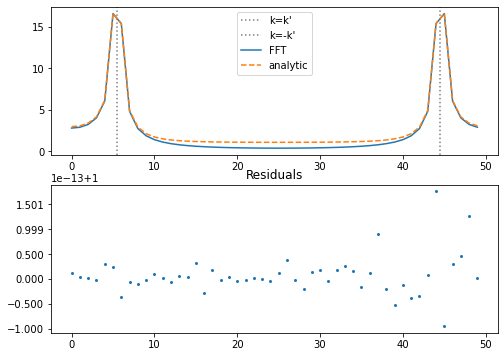

STD between analytic and numpy DFT:  5.2013877907668444e-14


In [11]:
#now with float k
N = 50
x = np.arange(N)
k = 5.5
sinArr = np.sin(2*np.pi*k*x/N)

sinArrDFT = np.fft.fft(sinArr)
sinArrAn, k_arr = analyticSinFT(k, x, N)

plt.plot(x, sinArr)
plt.show()

#looks like a delta function that has been spread out a bit
fig, ax = plt.subplots(2, 1, figsize=(8,6))

ax[0].axvline(k, ls=":", color="grey", label="k=k'")
ax[0].axvline(-k+N, ls=":", color="grey", label="k=-k'")

ax[0].plot(k_arr, abs(sinArrDFT), label="FFT")
ax[0].plot(k_arr, abs(sinArrAn), ls="--", label="analytic")
ax[0].legend()

#pretty small
ax[1].set_title("Residuals")
ax[1].plot(k_arr, abs(sinArrDFT - sinArrAn), ls="", marker=".", markersize=4)
plt.show()

print("STD between analytic and numpy DFT: ", np.std(sinArrDFT - sinArrAn))

For the non-integer k, this looks similar to a delta function, with a large spike at +/-k but the base of the spike is quite wide, so it's not a true delta function. My analytic solution is quite close to the numpy one, with a STD ~$10^{-14}$.

#### d) 
*A common tool to get around this is the use of window functions. The leakage essentially comes from the fact that we have a sharp jump at the edge of the interval. If we multiply our input data by a function that goes to zero at the edges, this cancels out the jump, and so prevents the leakage from the jumps at the edges. Of course, since we have multiplied by the window in real space, we have convolved by it in Fourier space. One simple window we could use is 0.5 − 0.5 cos(2πx/N) (there are many, many choices). Show that when we multiply by this window, the spectral leakage for a non-integer period sine wave drops dramatically.*

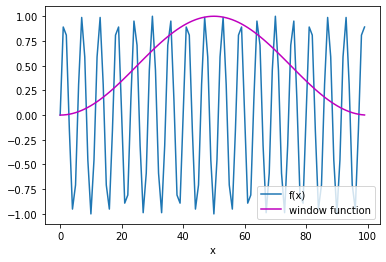

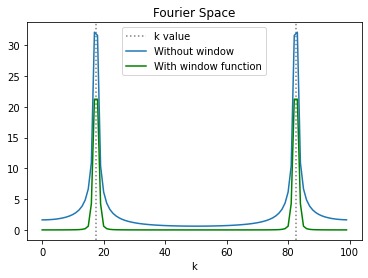

In [12]:
window = lambda x, N: 0.5 - 0.5*np.cos(2*np.pi*x/N)

N = 100 #number of points
x = np.arange(N)
k = 17.5
sinArr = np.sin(2*np.pi*k*x/N)

#plot starting functions
plt.plot(x, sinArr, label='f(x)')
plt.plot(x, window(x, N), label='window function', c='m')
plt.legend(loc="lower right")
plt.xlabel('x')

plt.show()

#do the FFT, and convolution
sinArrDFT = np.fft.fft(sinArr)
sinArrDFT_win = np.fft.fft(sinArr*window(x, len(x)))

#plot results
plt.title("Fourier Space")
plt.axvline(k, ls=":", color="grey", label="k value")
plt.axvline(N-k, ls=":", color="grey")
plt.plot(abs(sinArrDFT), label="Without window")
plt.plot(abs(sinArrDFT_win), label="With window function", c='g')
plt.legend()
plt.xlabel('k')

plt.show()

#### e) 
*Show that the Fourier transform of the window is [N/2 N/4 0 ... 0 N/4] (either numerically or analytically).*

*Use this to show that you can get the windowed Fourier transform by appropriate combinations of each point in the unwindowed Fourier transform and its immediate neighbors (you may need to be careful with signs here, since if you work through the math, some of the transforms need to be inverse FFTs).*

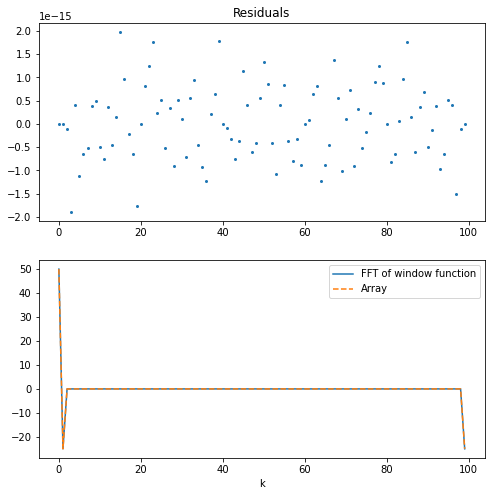

In [13]:
#show FFT
N = 100 #number of points
x = np.arange(N)

DFT_win = np.fft.fft(window(x, N))

man_arr = np.zeros(N)

man_arr[0] = N/2
man_arr[1] = -N/4 #if you do the DFT of the window function, actually get negative for these two
man_arr[-1] = -N/4

# print(man_arr)
# print(DFT_win.real)

fig, ax = plt.subplots(2, 1, figsize=(8,8))

ax[0].set_title("Residuals")
ax[0].plot(np.real(DFT_win) - man_arr, ls="", marker=".", markersize=4) #not prefect, but quite small
#the np.FFT doesn't seem to go quite to 0, I wonder why

ax[1].plot(np.real(DFT_win), label="FFT of window function")
ax[1].plot(man_arr, ls="--", label="Array")
ax[1].legend()
ax[1].set_xlabel('k')
plt.show()

So essentially the FFT of the window function is:

$W(k) = \begin{cases} 
      \frac{N}{4} & k=0 \\
      \frac{-N}{2} & k=\pm 1 \\
      0 & else
   \end{cases} \\
   = \frac{N}{4} \delta(k) - \frac{N}{2}\delta(k-1) - \frac{N}{2}\delta(k+1 ~ \text{mod} N)
$

Use mod as we need to account for the k values that wrap around, not just like a normal python array

So to do the actual FT, the convolution with the window function is just going to pick out 3 values for each k.
$
DFT(f(x)W(x))[k] =  f(k)*W(k)  \\
= \sum_{i=0}^{N-1} f[k-i]W[i] = \sum_{i=0}^{N-1} f[k-i] (\frac{N}{4} \delta(i) - \frac{N}{2}\delta(i-1) - \frac{N}{2}\delta(i+1 ~ \text{mod} N)) \\
= 1/N (\frac{N}{4} f(k) - \frac{N}{2}f(k-1) - \frac{N}{2}f(k+1 ~ \text{mod} N))\\
= \frac{1}{4} f(k) - \frac{1}{2}f(k-1) - \frac{1}{2}f(k+1 ~ \text{mod} N)
$

In [14]:
#looking at convolution, only going to get three values that are 
#nonzero for each value, as g[i] is 0 unless i = 0, 1, -1

def getWindowedFFT(DFT):
    kVals = np.arange(len(DFT))
    WArr = np.array([1/2 * DFT[k] - 1/4 * DFT[(k-1)%N] - 1/4 * DFT[(k+1)%N] for k in kVals])
    
    return WArr


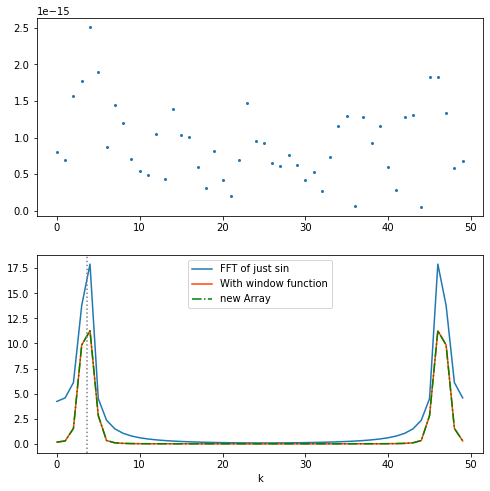

STD between analytic and numpy DFT:  1.0545559774239931e-15


In [15]:
N = 50 #number of points
x = np.arange(N)
k = 3.6

windowFuct = window(x, N)
sinArr = np.sin(2*np.pi*k*x/N)

sinArrDFT = np.fft.fft(sinArr)
sinArrDFT_win = np.fft.fft(sinArr*window(x, N))

#corrected FFT using neighboring points to reconstruct window behavior
fixedFT = getWindowedFFT(sinArrDFT)

#plotting
fig, ax = plt.subplots(2, 1, figsize=(8,8))

#residuals
ax[0].plot(abs(sinArrDFT_win - fixedFT), ls="", marker=".", markersize=4)

ax[1].plot(abs(sinArrDFT), label="FFT of just sin")

ax[1].plot(abs(sinArrDFT_win), label="With window function", c='orangered')
ax[1].plot(abs(fixedFT), ls="-.", label="new Array", c='g')
ax[1].legend()
ax[1].set_xlabel('k')
ax[1].axvline(k, ls=":", color="grey", label="k value")
plt.show()

print("STD between analytic and numpy DFT: ", np.std(sinArrDFT_win - fixedFT)) #very small difference